# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import src.utils.utils as utils
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from src.data.Datasets import AISDiscreteRepresentation
from pathlib import Path
import pandas as pd

# Define the region to look into
region = "Bornholm"
zoom = 8
n = 6

In [2]:
# Use the SummaryModels class for everything related to the reconstructions
file_name = "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600"
summary_models = SummaryModels(file_name)
data = summary_models.run_evaluation_get_n(n=n, worst=False, vessel_type="Cargo")
df_best_cargo = data["TrajectoryLevelData"]
train_evaluate_best_cargo = data["TrainEvaluateObject"]

# Use the VisualiseTrajectories class for geographically visualising trajectories 
fig_size = (10, 10)
visualise_trajectories = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size, zoom=zoom)
visualise_trajectories_discrete = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size,
                                                        zoom=zoom, continuous_representation=False)
processed_data_dir =  visualise_trajectories.processed_data_dir

# Load the static Google Map image for the RIO
img = visualise_trajectories.read_static_map()

In [3]:
# Read the info file to know how to read the data file
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info = utils.read_data_info_file(data_info_file)

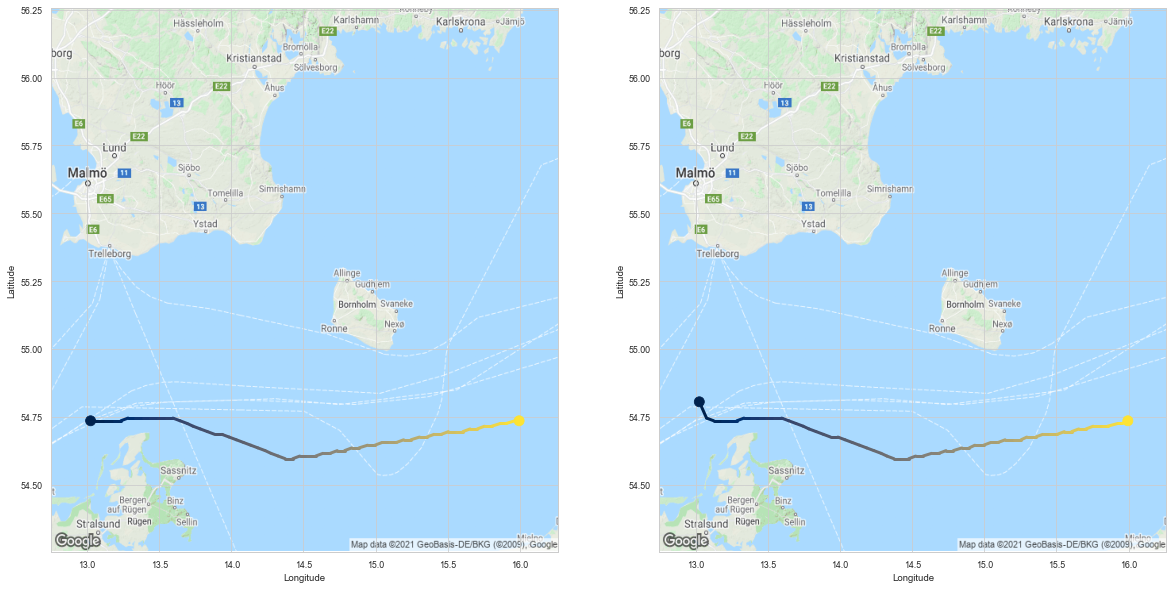

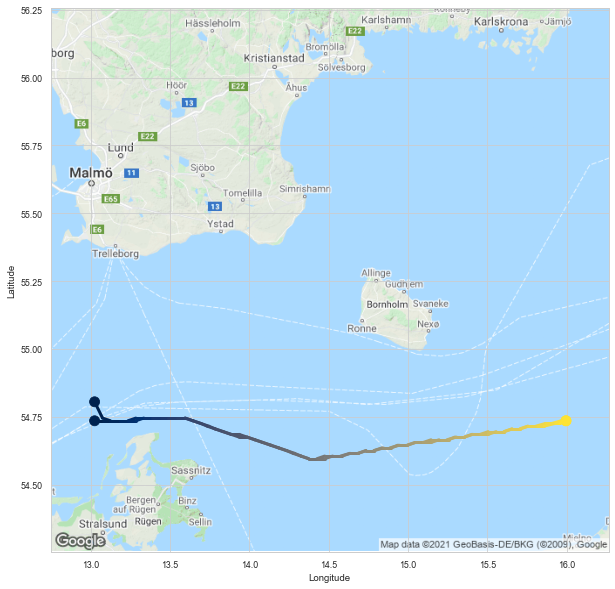

In [4]:
# Function that plots the actual and reconstructed side by side
def plot_actual_reconstructed(idx):
    # Plot a single complete vessel trajectory on the static map - Discrete representation
    visualise_trajectories_discrete.fig_size = (20,10)
    fig, ax = visualise_trajectories_discrete.visualise_static_map(img, subplots=[1, 2])
    plot_figures_tmp = visualise_trajectories_discrete.plot_figures
    visualise_trajectories_discrete.plot_figures = False
    index = df_best_cargo.iloc[idx]["Index"]
    data_set = AISDiscreteRepresentation(file_name, data_info=data_info, indicies=[index])
    df_actual = utils.get_tracks_from_dataset(data_set, continuous_representation=False)
    visualise_trajectories_discrete.plot_single_track(df_actual, ax[0], use_cmap=True)

    # Plot the corresponding model reconstruction
    index = df_best_cargo.iloc[idx]["Data set Index"]
    data_set = train_evaluate_best_cargo.validation_dataloader.dataset
    reconstruction = train_evaluate_best_cargo.track_reconstructions(data_set, index)
    df_recon = reconstruction["Reconstruction"]
    visualise_trajectories_discrete.plot_figures = plot_figures_tmp
    visualise_trajectories_discrete.plot_single_track(df_recon, ax[1], use_cmap=True)
    return {"Actual trajectory": df_actual, "Reconstructed trajectory": df_recon}

# Plot the actual and reconstructed trajectories side by side
tracks = plot_actual_reconstructed(2)

# Plot them on the same figure
visualise_trajectories.fig_size = fig_size
fig, ax = visualise_trajectories.visualise_static_map(img)
visualise_trajectories_discrete.plot_single_track(tracks["Actual trajectory"], ax, use_cmap=True)
visualise_trajectories_discrete.plot_single_track(tracks["Reconstructed trajectory"], ax, use_cmap=True)

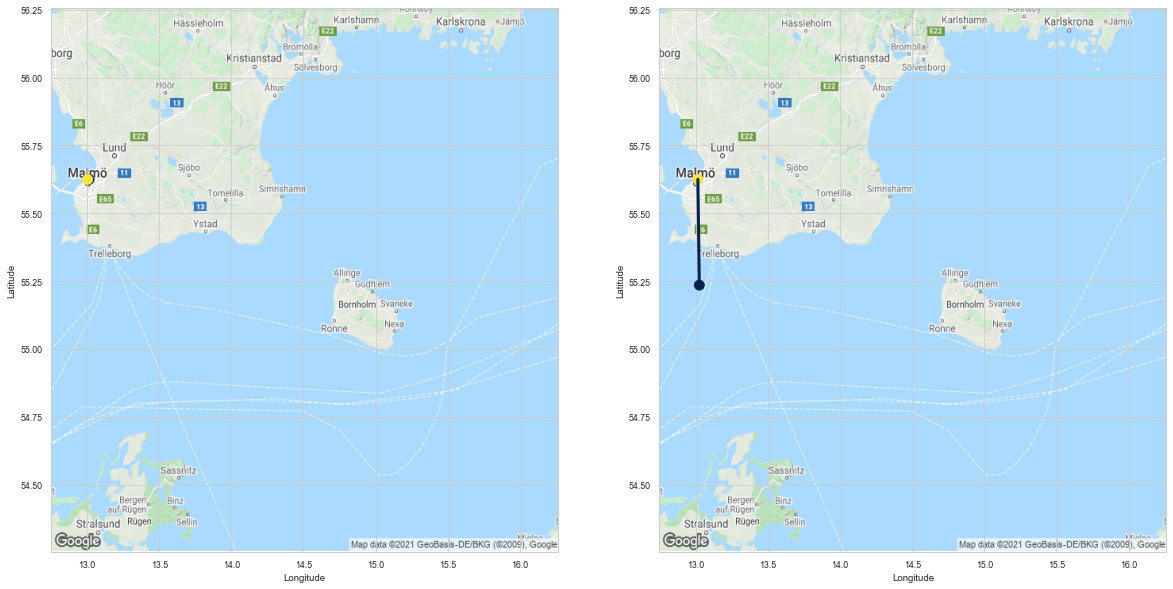

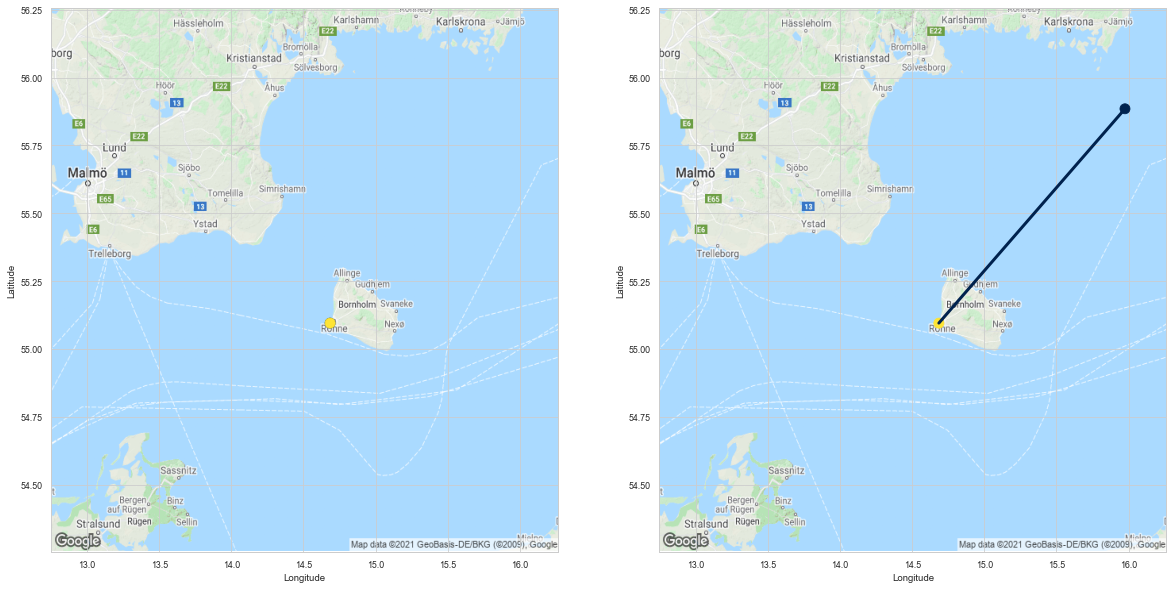

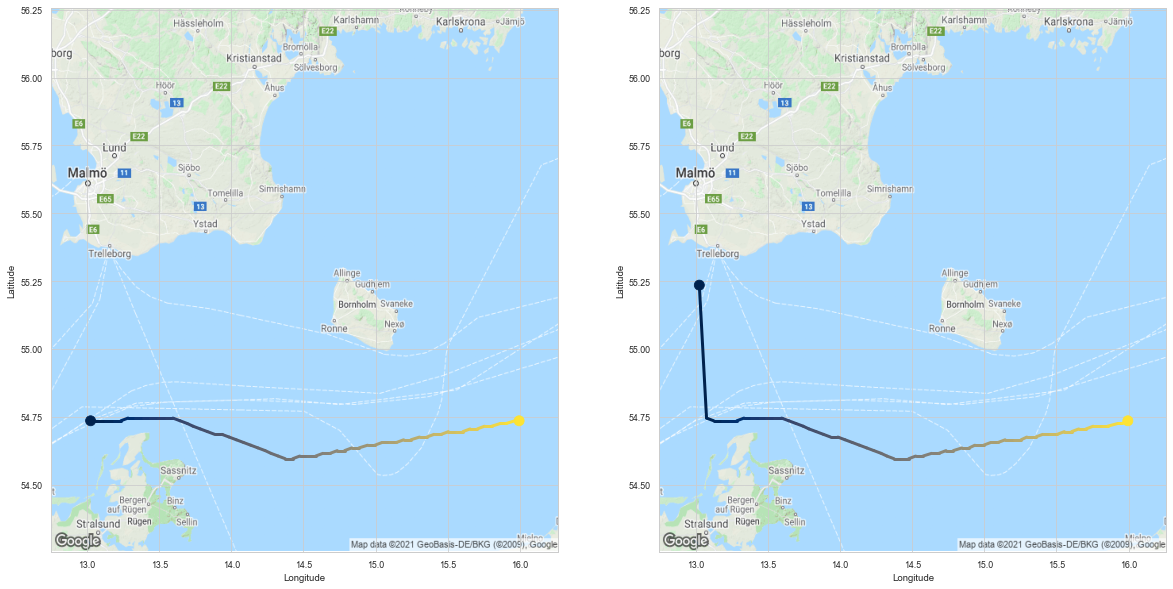

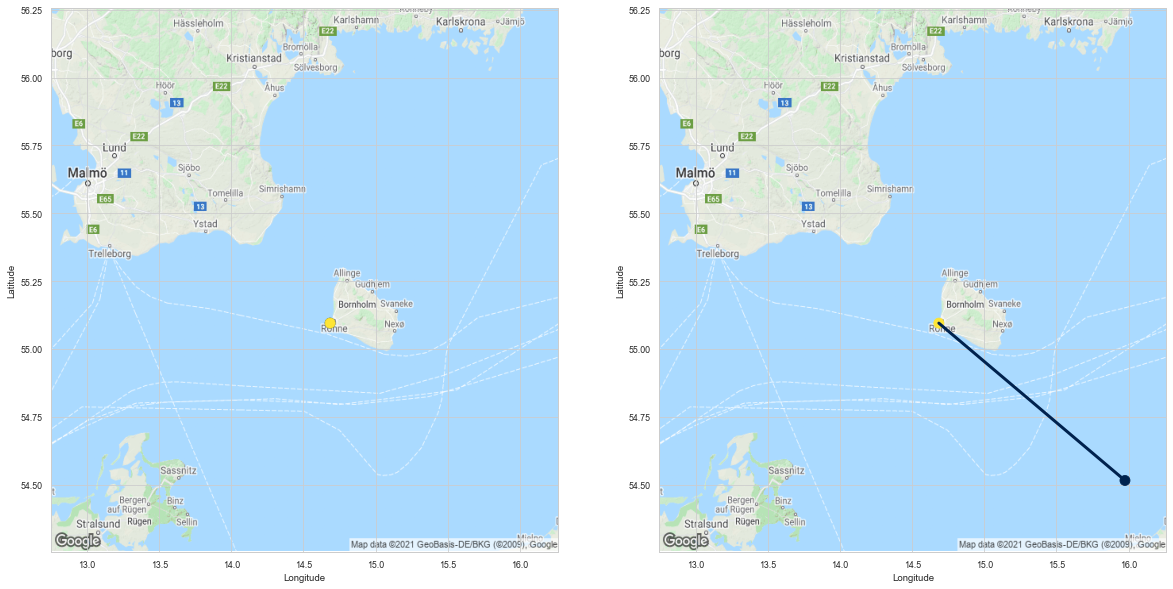

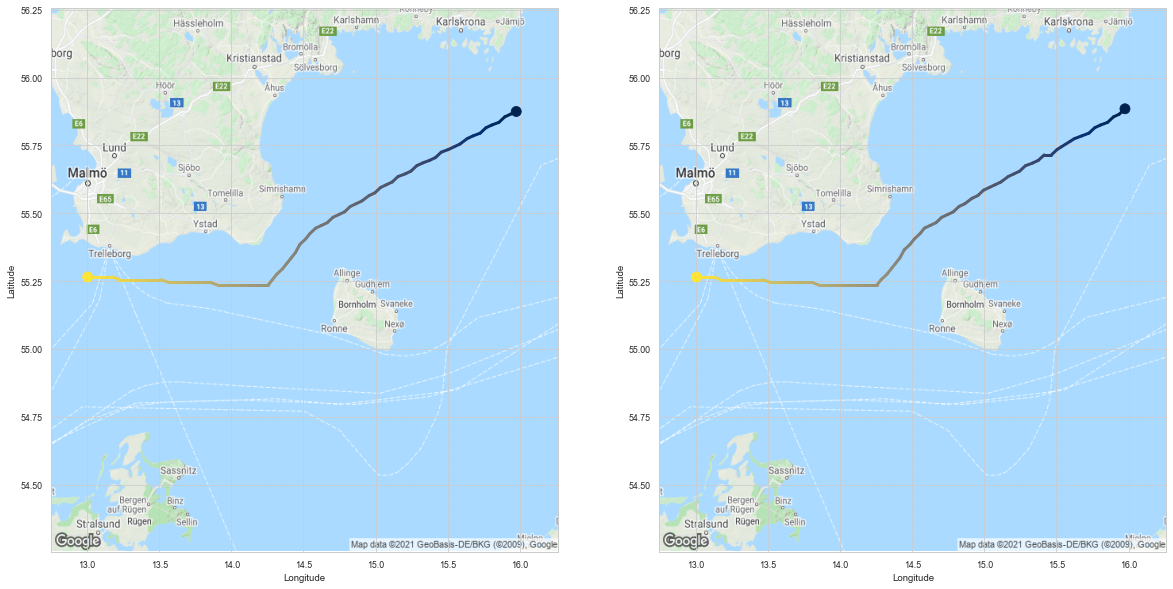

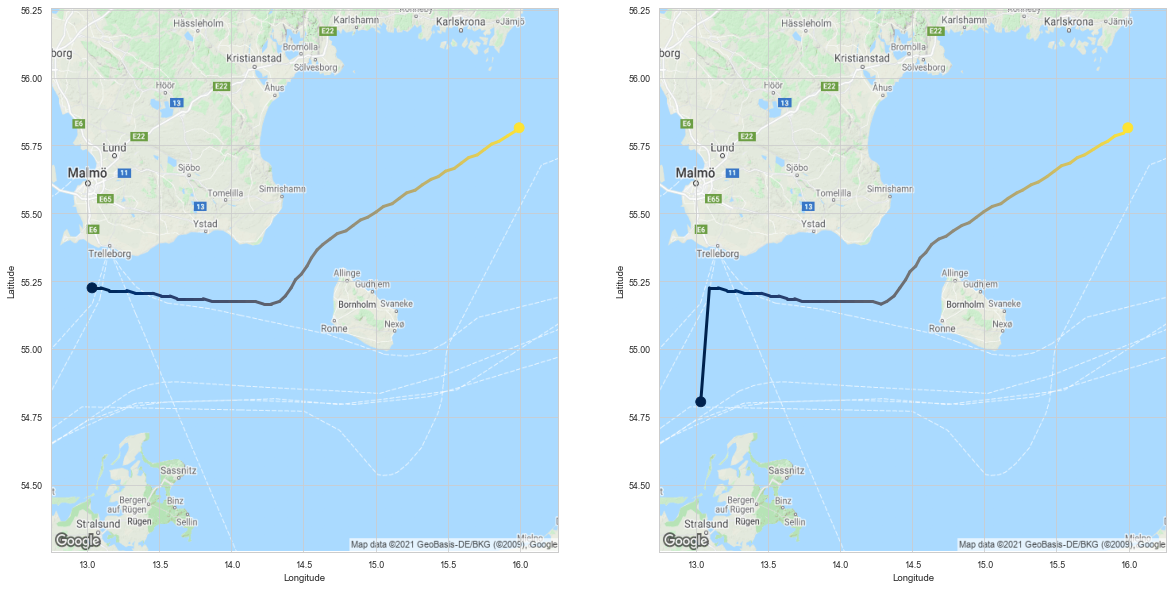

In [5]:
# Plot the actual and reconstructed trajectories side by side
for idx in range(n): 
    tracks = plot_actual_reconstructed(idx)

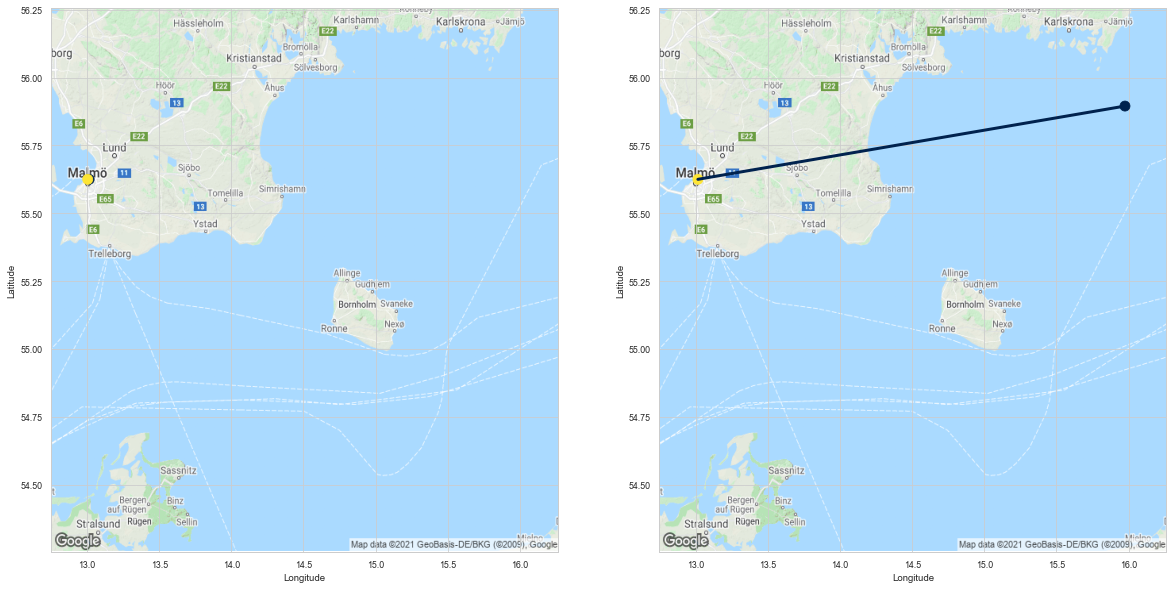

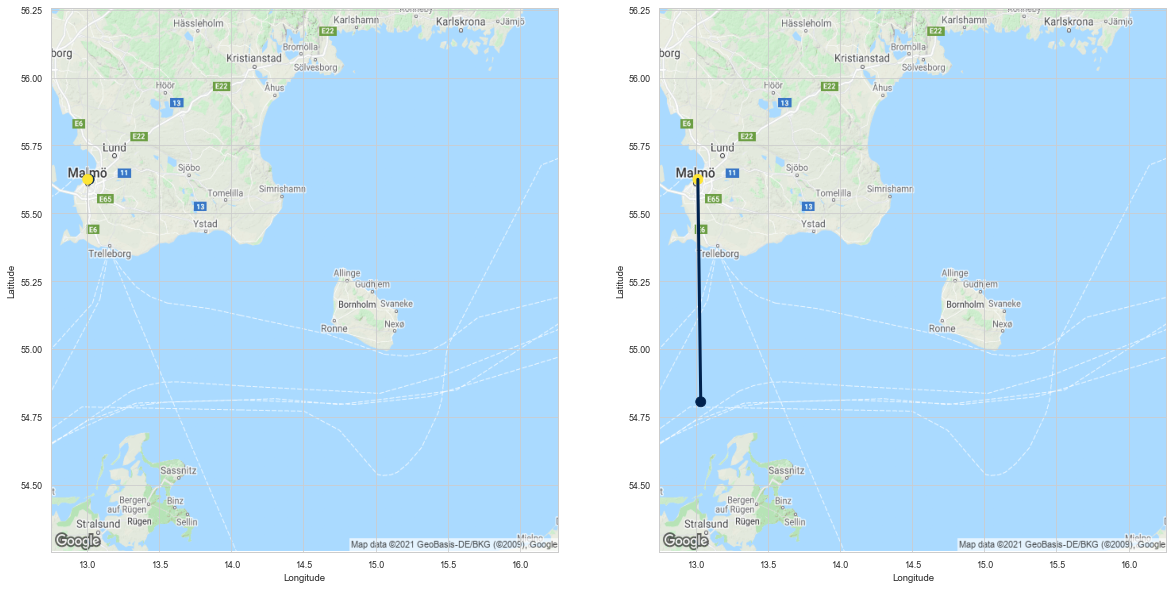

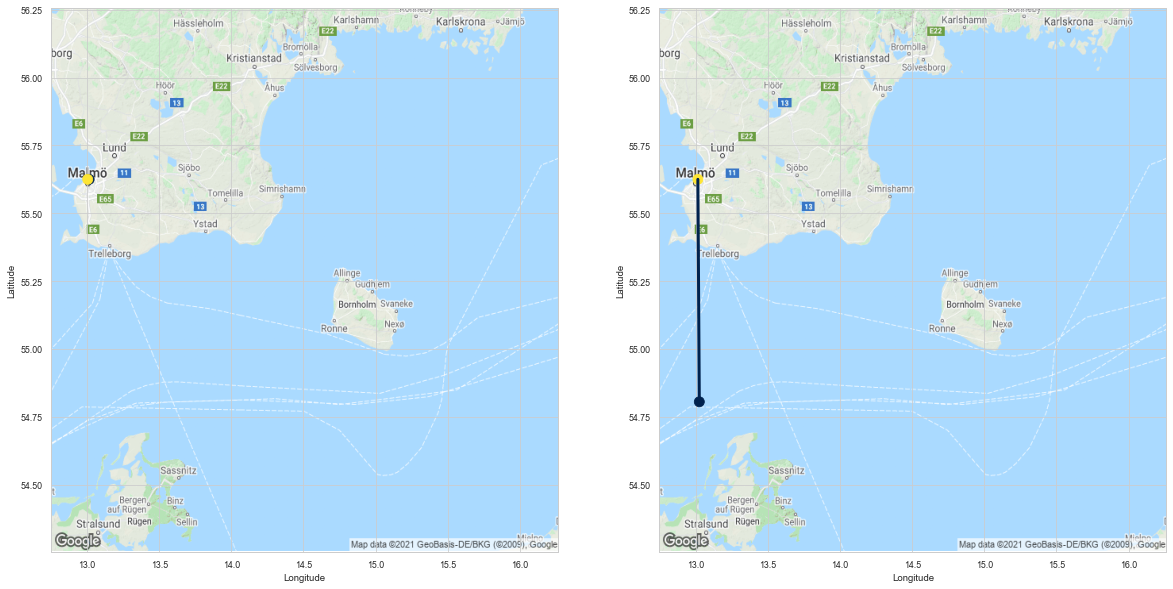

In [6]:
# Plot the actual and reconstructed trajectories side by side
for idx in range(3): 
    tracks = plot_actual_reconstructed(0)